In [3]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from pytorchyolo.models import load_model

from minepsilon import yf_det_fn as yf_detect_faces
from minepsilon import mp_det_fn as mp_detect_faces
from minepsilon import yn_det_fn as yn_detect_faces

from generate_perturbation import pipeline
from extract_image_mask import create_mask

In [5]:
def generate_gaussian(image, model):
    noisy_img = noisy_img.astype('float64')
            
    #create the gaussian noise
    np.random.seed(0)
    model.predict()
    gaussian = np.random.normal(0, sigma, (y2-y1, x2-x1, img.shape[2])) 

    #add gaussian noise to the img
    noisy_img[y1:y2, x1:x2, :] = noisy_img[y1:y2, x1:x2, :] + gaussian

    # remove values that are <-1 and >255
    noisy_img = np.where(noisy_img < 0, 0, noisy_img)
    noisy_img = np.where(noisy_img > 255, 255, noisy_img)

    #convert img back to uint
    noisy_img = noisy_img.astype('uint8')
    return noisy_img

In [7]:
def generate_fgsm(img_path, model, face_index):
    create_mask(img_path)
    image = pipeline(img_path, model, 'HSV', 0, 1, face_index)
    return image

In [8]:
import joblib 
gaussian_model = joblib.load("file.pkl")
fgsm_model = joblib.load("file.pkl")

FileNotFoundError: [Errno 2] No such file or directory: 'file.pkl'

In [14]:
path = r"E:\Documents\GitHub\THS-ST1\image.jpg"
labels = ["A", "B", "C", "D"]
order = ['image', 'fgsm_model', 'fgsm_naive', 'gaussian']

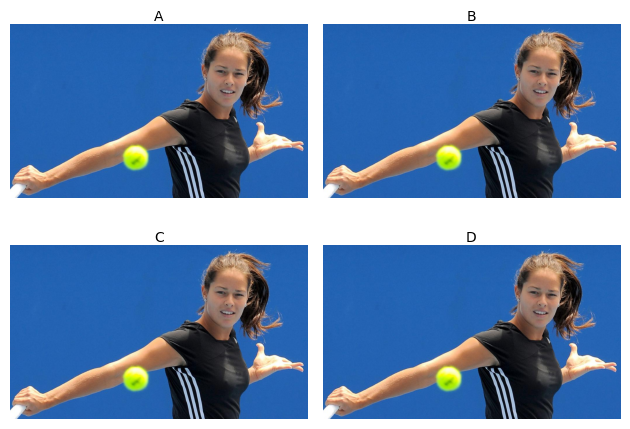

In [23]:
path = 'image.jpg'

fig, axs = plt.subplots(2, 2)
# Iterate over the image paths and display images in subplots
for i, image_type in enumerate(order):
    # Read the image
    image = plt.imread(path)
    
    row = i // 2
    col = i % 2
    
#     if (image_type == 'image'):
#         image = image
#     elif (image_type == 'fgsm_model'):
#         image = generate_fgsm(img_path, model, face_index)
#     elif (image_type == 'fgsm_naive'):
#         image = generate_naive(fgsm_path, model, face_index)
#     elif (image_type == 'gaussian'):
#         image = generate_gaussian(image, sigma)
#     else:
#         raise Exception("Invalid Order")
    
    # Display the image in the corresponding subplot
    axs[row, col].imshow(image)
    axs[row, col].axis("off")  # Optionally turn off axis labels
    
    # Set the label below the subplot
    axs[row, col].set_title(labels[i], fontsize=10, pad=2)
    
# Adjust the layout and spacing
plt.tight_layout()

# Show the plot
plt.show()

In [21]:
size_order = ['L', 'S', 'M', 'S', 'L', 'M', 'M', 'S', 'L']